In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score, accuracy_score


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

warnings.filterwarnings("ignore")
%matplotlib inline

## Read Data

In [5]:
# Load data
df= pd.read_csv('../data\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
# check the shape
df.shape

(1338, 7)

In [7]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']


# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'expenses']

We have 3 categorical features : ['sex', 'smoker', 'region']


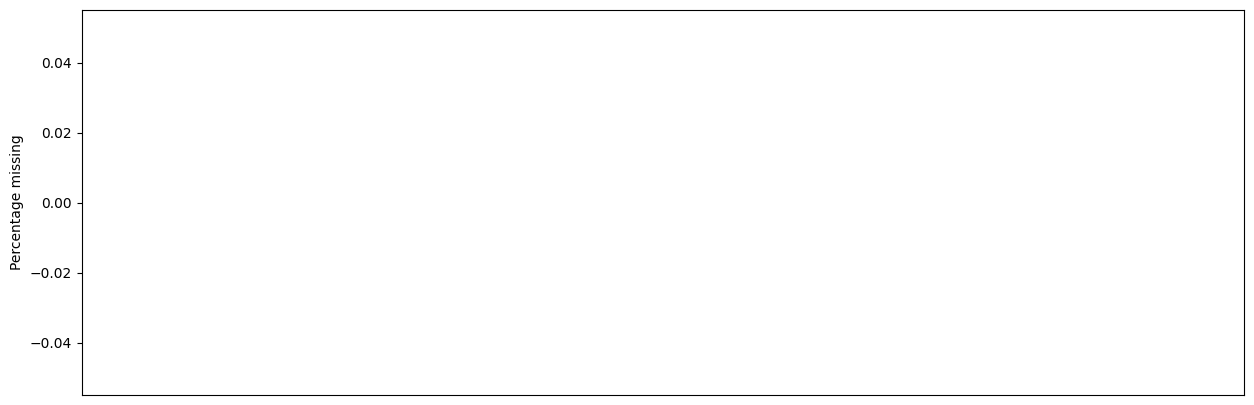

In [8]:
# Plotting Missing values count for each column
fig, ax = plt.subplots(figsize=(15,5))

missing = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0, ascending = False)

ax.bar(missing.index, missing.values.T[0])
plt.xticks([])
plt.ylabel("Percentage missing")
plt.show()

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [25]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [19]:
# Splitting X and y for all Experiments

X = df.drop('expenses', axis = 1)
y = df['expenses']

In [20]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_feature = X.select_dtypes(include="object").columns

preprocessor = ColumnTransformer([
        ('StandardScaler', StandardScaler(), num_features),
        ('OneHotEncoder', OneHotEncoder(), cat_feature)
])



In [26]:
num_features

Index(['age', 'bmi', 'children'], dtype='object')

In [27]:
cat_feature

Index(['sex', 'smoker', 'region'], dtype='object')

In [21]:
X= preprocessor.fit_transform(X)

In [24]:
X

array([[-1.43876426, -0.4536457 , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.51418574, -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38295436,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.02270734, -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79812808, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.25679863, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]])

In [14]:
X.shape

(1338, 11)

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [29]:
def evaluate_models(X, y, models):

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

    models_list = []
    r2_list =[]

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred= model.predict(X_train)
        y_test_pred= model.predict(X_test)

      # Evaluate Train and Test dataset
        model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

        model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        
        print('Model performance for Training set')
        print("Root Mean Squared Error: {:.4f}".format(model_train_rmse))
        print("Mean Absolute Error: {:.4f}".format(model_train_mae))
        print("R2 Score: {:.4f}".format(model_train_r2))

        print('----------------------------------')
        
        print('Model performance for Test set')
        print("Root Mean Squared Error: {:.4f}".format(model_test_rmse))
        print("Mean Absolute Error: {:.4f}".format(model_test_mae))
        print("R2 Score: {:.4f}".format(model_test_r2))
        r2_list.append(model_test_r2)
        
        print('='*35)
        print('\n')
        
    report= pd.DataFrame(list(zip(models_list, r2_list)), columns= ['Model Name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)
        
    return report

In [30]:
evaluate_models(X, y, models)

Linear Regression
Model performance for Training set
Root Mean Squared Error: 6105.2451
Mean Absolute Error: 4207.9766
R2 Score: 0.7418
----------------------------------
Model performance for Test set
Root Mean Squared Error: 5796.5563
Mean Absolute Error: 4181.5615
R2 Score: 0.7836


Lasso
Model performance for Training set
Root Mean Squared Error: 6105.2477
Mean Absolute Error: 4208.0439
R2 Score: 0.7418
----------------------------------
Model performance for Test set
Root Mean Squared Error: 5797.3268
Mean Absolute Error: 4182.4458
R2 Score: 0.7835


Ridge
Model performance for Training set
Root Mean Squared Error: 6105.3089
Mean Absolute Error: 4212.3760
R2 Score: 0.7417
----------------------------------
Model performance for Test set
Root Mean Squared Error: 5798.5673
Mean Absolute Error: 4187.2631
R2 Score: 0.7834


K-Neighbors Regressor
Model performance for Training set
Root Mean Squared Error: 4770.4644
Mean Absolute Error: 2857.6957
R2 Score: 0.8423
-----------------------

,Model Name,R2_Score
7,CatBoosting Regressor,0.866221
5,Random Forest Regressor,0.861520
6,XGBRegressor,0.840573
8,AdaBoost Regressor,0.831525
0,Linear Regression,0.783573
1,Lasso,0.783515
2,Ridge,0.783422
3,K-Neighbors Regressor,0.768453
4,Decision Tree,0.754827


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [45]:
param_grids = {
    "Linear Regression": {
        'fit_intercept': [True, False]
    },
    "Lasso": {
        'alpha': [0.1, 1.0, 10.0]
    },
    "Ridge": {
        'alpha': [0.1, 1.0, 10.0]
    },
    "K-Neighbors Regressor": {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 10, 20]
    },
    "Random Forest Regressor": {
        'n_estimators': [50, 100, 200],
        'max_depth': [0, 10, 20, 30]
    },
    "XGBRegressor": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    "CatBoosting Regressor": {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [3, 5, 7]
    },
    "AdaBoost Regressor": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}


In [46]:
best_models = {}
for name, pipeline in models.items():
    print(f"Running GridSearchCV for {name}...")
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grids[name], cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best params for {name}: {grid_search.best_params_}")
    print(f"Best R² score for {name}: {grid_search.best_score_}")


Running GridSearchCV for Linear Regression...
Best params for Linear Regression: {'fit_intercept': True}
Best R² score for Linear Regression: 0.7331310280462232
Running GridSearchCV for Lasso...
Best params for Lasso: {'alpha': 10.0}
Best R² score for Lasso: 0.7334174415863073
Running GridSearchCV for Ridge...
Best params for Ridge: {'alpha': 1.0}
Best R² score for Ridge: 0.7331641867249727
Running GridSearchCV for K-Neighbors Regressor...
Best params for K-Neighbors Regressor: {'n_neighbors': 7, 'weights': 'distance'}
Best R² score for K-Neighbors Regressor: 0.7645288246933197
Running GridSearchCV for Decision Tree...
Best params for Decision Tree: {'max_depth': 10, 'min_samples_split': 20}
Best R² score for Decision Tree: 0.8067044489659662
Running GridSearchCV for Random Forest Regressor...
Best params for Random Forest Regressor: {'max_depth': 10, 'n_estimators': 200}
Best R² score for Random Forest Regressor: 0.8307783000720441
Running GridSearchCV for XGBRegressor...
Best params 

In [49]:
results = []
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results.append({
        'Model': name,
        'R2 Score': r2
    })

# Display the results
results_df = pd.DataFrame(results).sort_values(by = 'R2 Score', ascending = False)
print(results_df)


                     Model  R2 Score
7    CatBoosting Regressor  0.881305
6             XGBRegressor  0.879468
5  Random Forest Regressor  0.862217
8       AdaBoost Regressor  0.855120
4            Decision Tree  0.830977
0        Linear Regression  0.783573
2                    Ridge  0.783422
1                    Lasso  0.783017
3    K-Neighbors Regressor  0.777481


#### The Final Model --> CatBoosting Regressor

In [55]:
model = CatBoostRegressor(depth = 3, iterations= 100, learning_rate= 0.1, verbose=False)
model.fit(X_train, y_train)

In [56]:
y_train_pred= model.predict(X_train)

In [57]:
y_test_pred= model.predict(X_test)

In [58]:
model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)


In [59]:
model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

In [67]:
print(f"R2-Score Train Data: {model_train_r2}") 
print(f"R2-Score Test Data: {model_test_r2}") 
        

R2-Score Train Data: 0.8735305637262655
R2-Score Test Data: 0.8813053687243874
